In [14]:
from google.colab import files
uploaded = files.upload()

Saving 557629_1234650_bundle_archive.zip to 557629_1234650_bundle_archive.zip


In [15]:
!ls

557629_1234650_bundle_archive.zip  sample_data


In [16]:
!unzip 557629_1234650_bundle_archive.zip

Archive:  557629_1234650_bundle_archive.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
case = pd.read_csv('covid_19_india.csv')

In [21]:
case.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [0]:
case.info()

In [0]:
case['Date'] = pd.to_datetime(case['Date'], format='%d/%m/%y')

In [24]:
case.describe()

,Sno,Cured,Deaths,Confirmed
count,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,847.454950,60.484755,2048.870161
std,842.787043,3067.658905,246.276168,7038.064300
min,1.000000,0.000000,0.000000,0.000000
25%,730.500000,1.000000,0.000000,12.000000
50%,1460.000000,24.000000,1.000000,86.000000
75%,2189.500000,320.500000,16.000000,1141.000000
max,2919.000000,44517.000000,3438.000000,94041.000000


In [25]:
case['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu'],
      dtype=object)

In [26]:
case['State/UnionTerritory'].nunique()

38

In [27]:
case['ConfirmedIndianNational'].unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-'], dtype=object)

In [28]:
case[case['ConfirmedIndianNational'] == '-'].head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
446,447,2020-03-29,7:30 PM,Andhra Pradesh,-,-,1,0,19
447,448,2020-03-29,7:30 PM,Andaman and Nicobar Islands,-,-,0,0,9
448,449,2020-03-29,7:30 PM,Bihar,-,-,0,1,11
449,450,2020-03-29,7:30 PM,Chandigarh,-,-,0,0,8
450,451,2020-03-29,7:30 PM,Chhattisgarh,-,-,0,0,7


In [29]:
print(len(case))
print(len(case[case['ConfirmedIndianNational'] == '-']))
print(len(case[case['ConfirmedForeignNational'] == '-']))

2919
2473
2473


In [30]:
case[case['ConfirmedForeignNational'] == '-']['Date'].min()

Timestamp('2020-03-29 00:00:00')

In [31]:
case[case['ConfirmedForeignNational'] == '-']['Date'].max()

Timestamp('2020-06-11 00:00:00')

In [32]:
%%time
case = case.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Sno'], axis=1)

CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 1.32 ms


In [0]:
case = case.sort_values(['State/UnionTerritory','Date']).reset_index(drop=True)

In [0]:
%%time
case.head()

In [0]:
state_cases = case.groupby(['State/UnionTerritory']).agg({'Cured':'max', 'Deaths':'max', 'Confirmed':'max'}).sort_values(by='Confirmed').reset_index()

In [35]:
state_cases.head()

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Daman & Diu,0,0,2
1,Sikkim,0,0,13
2,Dadar Nagar Haveli,2,0,26
3,Andaman and Nicobar Islands,33,0,34
4,Meghalaya,13,1,44


CPU times: user 106 ms, sys: 2.96 ms, total: 109 ms
Wall time: 110 ms


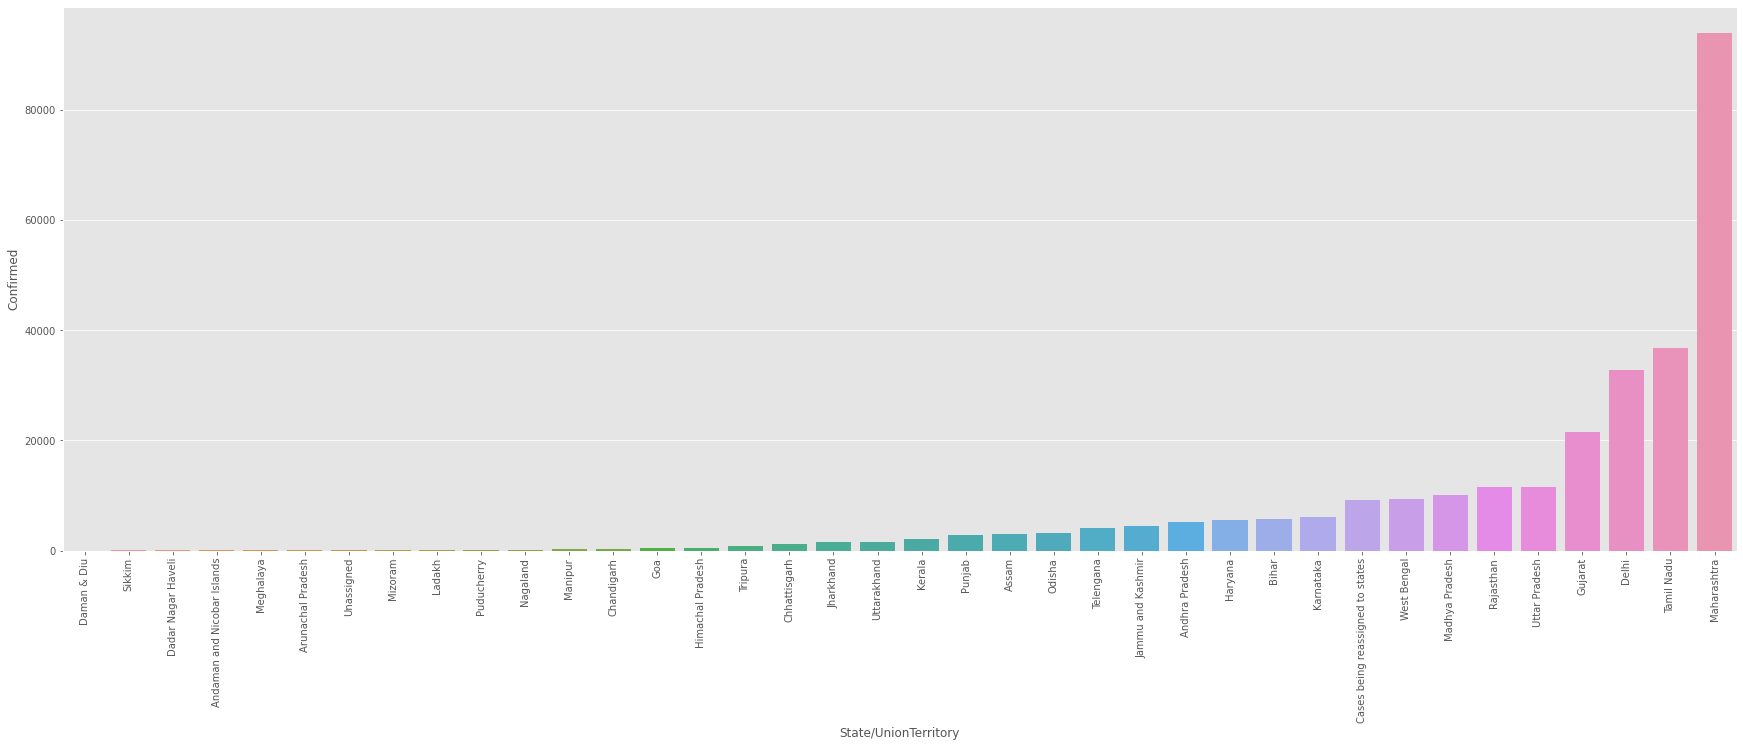

In [36]:
%%time
plt.figure(figsize=(30, 10))
sns.barplot(x='State/UnionTerritory', y='Confirmed',data=state_cases)
plt.xticks(rotation=90)

In [0]:
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Cured'] + state_cases['Deaths'])

In [38]:
state_cases.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,Daman & Diu,0,0,2,2
1,Sikkim,0,0,13,13
2,Dadar Nagar Haveli,2,0,26,24
3,Andaman and Nicobar Islands,33,0,34,1
4,Meghalaya,13,1,44,30


In [0]:
state_cases['Confirmed_%'] = round(state_cases['Confirmed'] / state_cases['Confirmed'].sum() * 100, 2)

In [40]:
state_cases['State/UnionTerritory'].unique()

array(['Daman & Diu', 'Sikkim', 'Dadar Nagar Haveli',
       'Andaman and Nicobar Islands', 'Meghalaya', 'Arunachal Pradesh',
       'Unassigned', 'Mizoram', 'Ladakh', 'Puducherry', 'Nagaland',
       'Manipur', 'Chandigarh', 'Goa', 'Himachal Pradesh', 'Tripura',
       'Chhattisgarh', 'Jharkhand', 'Uttarakhand', 'Kerala', 'Punjab',
       'Assam', 'Odisha', 'Telengana', 'Jammu and Kashmir',
       'Andhra Pradesh', 'Haryana', 'Bihar', 'Karnataka',
       'Cases being reassigned to states', 'West Bengal',
       'Madhya Pradesh', 'Rajasthan', 'Uttar Pradesh', 'Gujarat', 'Delhi',
       'Tamil Nadu', 'Maharashtra'], dtype=object)

In [41]:
state_cases.tail()

,State/UnionTerritory,Cured,Deaths,Confirmed,Active,Confirmed_%
33,Uttar Pradesh,6871,321,11610,4418,4.05
34,Gujarat,14735,1347,21521,5439,7.50
35,Delhi,12245,984,32810,19581,11.43
36,Tamil Nadu,19333,326,36841,17182,12.84
37,Maharashtra,44517,3438,94041,46086,32.77


In [0]:
state_cases = state_cases.tail(8)

In [43]:
state_cases

,State/UnionTerritory,Cured,Deaths,Confirmed,Active,Confirmed_%
30,West Bengal,3779,432,9328,5117,3.25
31,Madhya Pradesh,6892,427,10049,2730,3.50
32,Rajasthan,8569,259,11600,2772,4.04
33,Uttar Pradesh,6871,321,11610,4418,4.05
34,Gujarat,14735,1347,21521,5439,7.50
35,Delhi,12245,984,32810,19581,11.43
36,Tamil Nadu,19333,326,36841,17182,12.84
37,Maharashtra,44517,3438,94041,46086,32.77


CPU times: user 49.3 ms, sys: 2.85 ms, total: 52.2 ms
Wall time: 56.9 ms


<Figure size 2160x720 with 0 Axes>

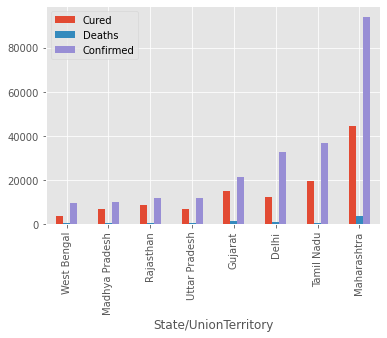

In [44]:
%%time
plt.figure(figsize=(30, 10))
state_cases.plot(x='State/UnionTerritory', y=['Cured', 'Deaths', 'Confirmed'], kind='bar')

In [0]:
state_cases['Death_%'] = round(state_cases['Deaths'] / state_cases['Confirmed'] * 100, 2)
state_cases['Cured_%'] = round(state_cases['Cured'] / state_cases['Confirmed'] * 100, 2)
state_cases['Active_%'] = round(state_cases['Active'] / state_cases['Confirmed'] * 100, 2)

In [46]:
state_cases

,State/UnionTerritory,Cured,Deaths,Confirmed,Active,Confirmed_%,Death_%,Cured_%,Active_%
30,West Bengal,3779,432,9328,5117,3.25,4.63,40.51,54.86
31,Madhya Pradesh,6892,427,10049,2730,3.50,4.25,68.58,27.17
32,Rajasthan,8569,259,11600,2772,4.04,2.23,73.87,23.90
33,Uttar Pradesh,6871,321,11610,4418,4.05,2.76,59.18,38.05
34,Gujarat,14735,1347,21521,5439,7.50,6.26,68.47,25.27
35,Delhi,12245,984,32810,19581,11.43,3.00,37.32,59.68
36,Tamil Nadu,19333,326,36841,17182,12.84,0.88,52.48,46.64
37,Maharashtra,44517,3438,94041,46086,32.77,3.66,47.34,49.01


In [0]:
case = case[case['State/UnionTerritory'].isin(state_cases['State/UnionTerritory'])]

In [48]:
case['State/UnionTerritory'].unique() 

array(['Delhi', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Rajasthan',
       'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'], dtype=object)

In [49]:
case[case['State/UnionTerritory']=='West Bengal'].tail(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
2909,2020-06-02,8:00 AM,West Bengal,2306,325,5772
2910,2020-06-03,8:00 AM,West Bengal,2410,335,6168
2911,2020-06-04,8:00 AM,West Bengal,2580,345,6508
2912,2020-06-05,8:00 AM,West Bengal,2768,355,6876
2913,2020-06-06,8:00 AM,West Bengal,2912,366,7303
2914,2020-06-07,8:00 AM,West Bengal,3119,383,7738
2915,2020-06-08,8:00 AM,West Bengal,3303,396,8187
2916,2020-06-09,8:00 AM,West Bengal,3465,405,8613
2917,2020-06-10,8:00 AM,West Bengal,3620,415,8985
2918,2020-06-11,8:00 AM,West Bengal,3779,432,9328


In [0]:
new_df = pd.pivot_table(case, values='Confirmed', index='Date',columns='State/UnionTerritory').reset_index()

In [0]:
from datetime import date as dt

In [52]:
new_df['week_num']=new_df.Date.dt.week
new_df.tail(15)

State/UnionTerritory,Date,Delhi,Gujarat,Madhya Pradesh,Maharashtra,Rajasthan,Tamil Nadu,Uttar Pradesh,West Bengal,week_num
87,2020-05-28,15257.0,15195.0,7261.0,56948.0,7703.0,18545.0,6991.0,4192.0,22
88,2020-05-29,16281.0,15562.0,7453.0,59546.0,8067.0,19372.0,7170.0,4536.0,22
89,2020-05-30,17386.0,15934.0,7645.0,62228.0,8365.0,20246.0,7284.0,4813.0,22
90,2020-05-31,18549.0,16343.0,7891.0,65168.0,8617.0,21184.0,7445.0,5130.0,22
91,2020-06-01,19844.0,16779.0,8089.0,67655.0,8831.0,22333.0,7823.0,5501.0,23
92,2020-06-02,20834.0,17200.0,8283.0,70013.0,8980.0,23495.0,8075.0,5772.0,23
93,2020-06-03,22132.0,17617.0,8420.0,72300.0,9373.0,24586.0,8361.0,6168.0,23
94,2020-06-04,23645.0,18100.0,8588.0,74860.0,9652.0,25872.0,8729.0,6508.0,23
95,2020-06-05,25004.0,18584.0,8762.0,77793.0,9862.0,27256.0,9237.0,6876.0,23
96,2020-06-06,26334.0,19094.0,8996.0,80229.0,10084.0,28694.0,9733.0,7303.0,23


In [53]:
 new_df['Delhi'].tail()

97     27654.0
98     27654.0
99     29943.0
100    31309.0
101    32810.0
Name: Delhi, dtype: float64

In [0]:
 df_fin = new_df.groupby('week_num').max().reset_index()

In [0]:
df_fin.drop('Date', axis=1, inplace=True)

In [56]:
cols = list(df_fin.columns)
cols.remove('week_num')

for col in cols:
    df_fin[col+'_d'] = round((df_fin[col] - df_fin[col].shift(1))/df_fin[col].shift(1) * 100,2)
df_fin

State/UnionTerritory,week_num,Delhi,Gujarat,Madhya Pradesh,Maharashtra,Rajasthan,Tamil Nadu,Uttar Pradesh,West Bengal,Delhi_d,Gujarat_d,Madhya Pradesh_d,Maharashtra_d,Rajasthan_d,Tamil Nadu_d,Uttar Pradesh_d,West Bengal_d
0,10,3.0,NaN,NaN,NaN,15.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,7.0,NaN,NaN,32.0,15.0,1.0,13.0,NaN,133.33,NaN,NaN,NaN,0.00,0.00,85.71,NaN
2,12,29.0,18.0,4.0,67.0,24.0,7.0,27.0,4.0,314.29,NaN,NaN,109.38,60.00,600.00,107.69,NaN
3,13,49.0,58.0,30.0,186.0,55.0,49.0,65.0,18.0,68.97,222.22,650.00,177.61,129.17,600.00,140.74,350.00
4,14,503.0,122.0,165.0,490.0,200.0,485.0,227.0,80.0,926.53,110.34,450.00,163.44,263.64,889.80,249.23,344.44
5,15,1069.0,432.0,564.0,1761.0,700.0,969.0,452.0,134.0,112.52,254.10,241.82,259.39,250.00,99.79,99.12,67.50
6,16,1893.0,1604.0,1407.0,3651.0,1351.0,1372.0,1084.0,310.0,77.08,271.30,149.47,107.33,93.00,41.59,139.82,131.34
7,17,2625.0,3071.0,2096.0,7628.0,2083.0,1821.0,1843.0,611.0,38.67,91.46,48.97,108.93,54.18,32.73,70.02,97.10
8,18,4122.0,5055.0,2846.0,12296.0,2772.0,2757.0,2626.0,922.0,57.03,64.60,35.78,61.20,33.08,51.40,42.49,50.90
9,19,6542.0,7796.0,3614.0,20228.0,3708.0,6535.0,3373.0,1786.0,58.71,54.22,26.99,64.51,33.77,137.03,28.45,93.71


In [57]:
df_fin.columns

Index(['week_num', 'Delhi', 'Gujarat', 'Madhya Pradesh', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal', 'Delhi_d',
       'Gujarat_d', 'Madhya Pradesh_d', 'Maharashtra_d', 'Rajasthan_d',
       'Tamil Nadu_d', 'Uttar Pradesh_d', 'West Bengal_d'],
      dtype='object', name='State/UnionTerritory')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f852bc36400>


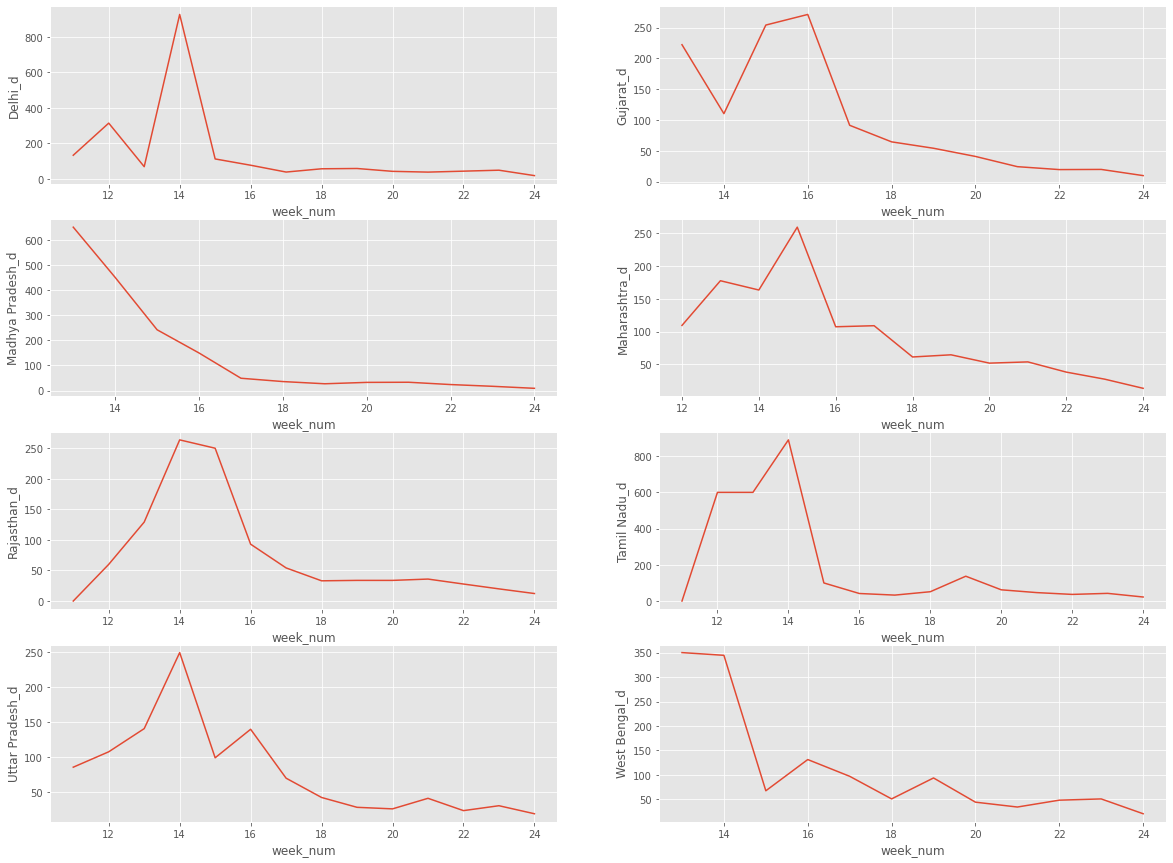

In [60]:
col2 = ['Delhi_d','Gujarat_d', 'Madhya Pradesh_d', 'Maharashtra_d', 'Rajasthan_d',
       'Tamil Nadu_d', 'Uttar Pradesh_d', 'West Bengal_d']

fig, ax= plt.subplots(4, 2, figsize=[20,15])
counter=0

print(ax)

for j in range(len(ax)):
    for i in range(2):
        if j==4 & i==1:
            break
        else:
            ax[j][i] = sns.lineplot(x='week_num', y=col2[counter], data=df_fin, ax=ax[j][i])
            ax[j][i].set_xlabel('week_num')
            ax[j][i].set_ylabel(col2[counter])
            counter+=1


In [0]:
cols = list(df_fin.columns)
cols.remove('week_num')

In [62]:
df_fin.columns

Index(['week_num', 'Delhi', 'Gujarat', 'Madhya Pradesh', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal', 'Delhi_d',
       'Gujarat_d', 'Madhya Pradesh_d', 'Maharashtra_d', 'Rajasthan_d',
       'Tamil Nadu_d', 'Uttar Pradesh_d', 'West Bengal_d'],
      dtype='object', name='State/UnionTerritory')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


10 loops, best of 3: 41.2 ms per loop


<Figure size 3600x1440 with 0 Axes>

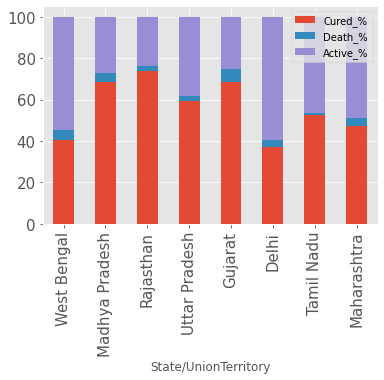

<Figure size 3600x1440 with 0 Axes>

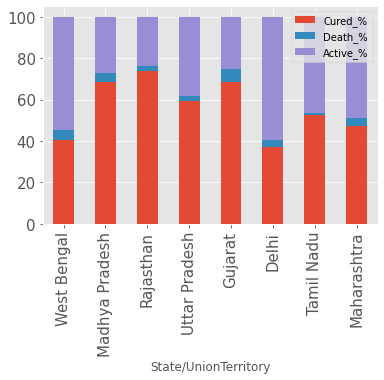

<Figure size 3600x1440 with 0 Axes>

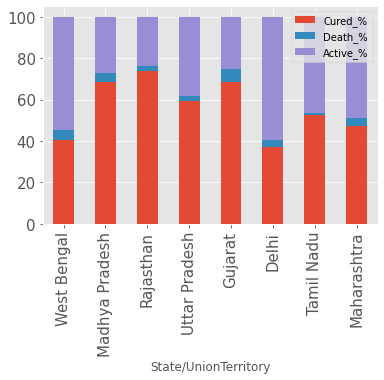

<Figure size 3600x1440 with 0 Axes>

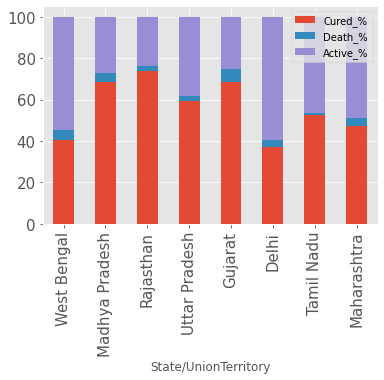

<Figure size 3600x1440 with 0 Axes>

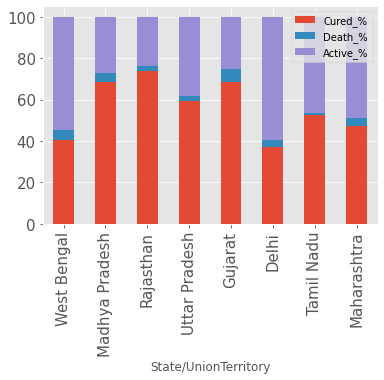

<Figure size 3600x1440 with 0 Axes>

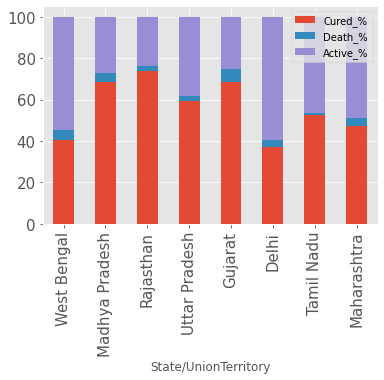

<Figure size 3600x1440 with 0 Axes>

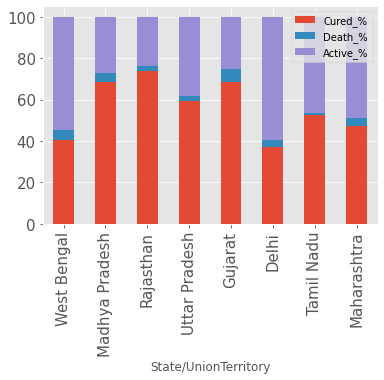

<Figure size 3600x1440 with 0 Axes>

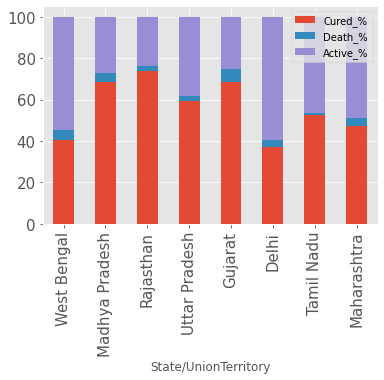

<Figure size 3600x1440 with 0 Axes>

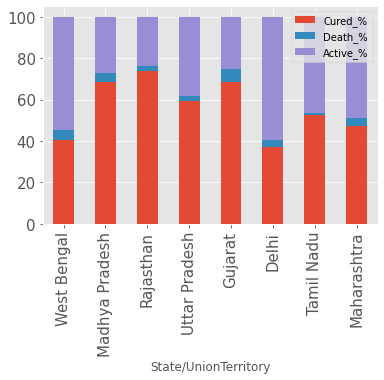

<Figure size 3600x1440 with 0 Axes>

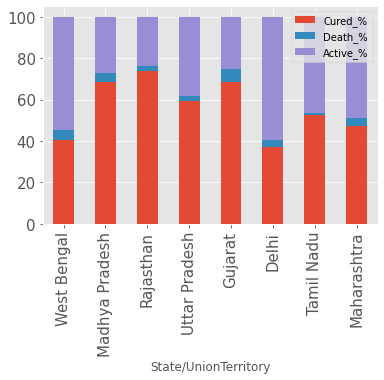

<Figure size 3600x1440 with 0 Axes>

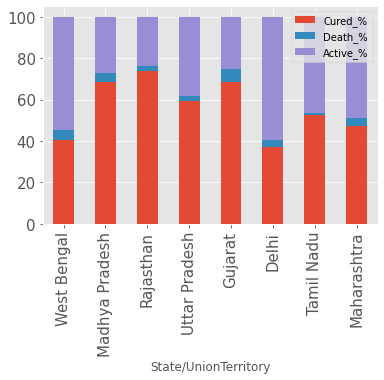

<Figure size 3600x1440 with 0 Axes>

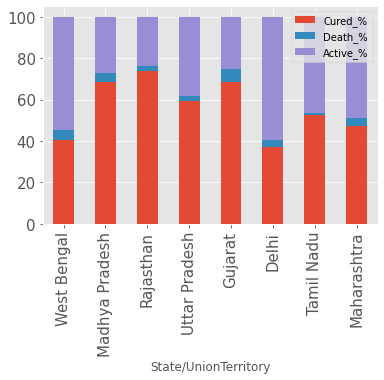

<Figure size 3600x1440 with 0 Axes>

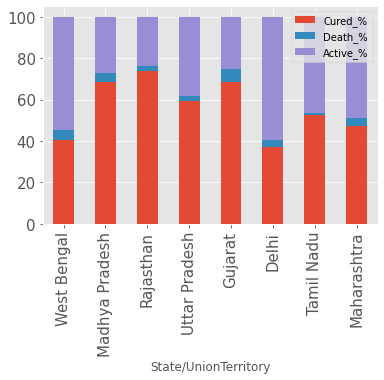

<Figure size 3600x1440 with 0 Axes>

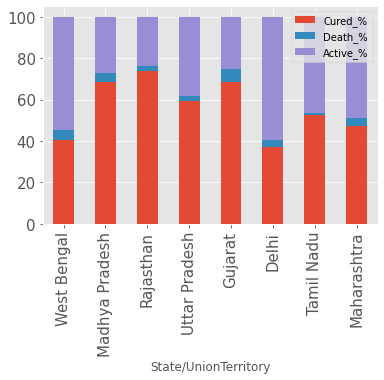

<Figure size 3600x1440 with 0 Axes>

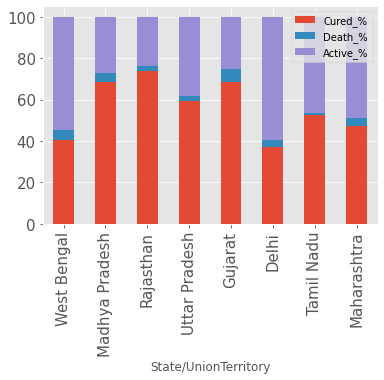

<Figure size 3600x1440 with 0 Axes>

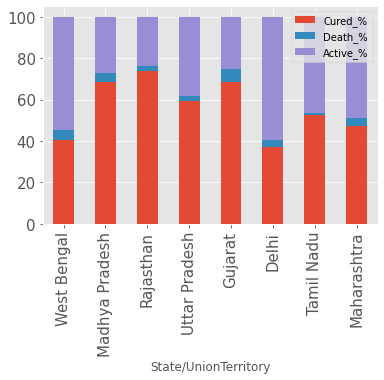

<Figure size 3600x1440 with 0 Axes>

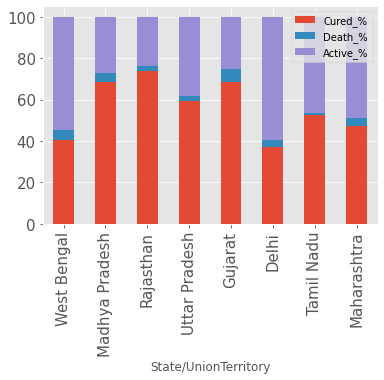

<Figure size 3600x1440 with 0 Axes>

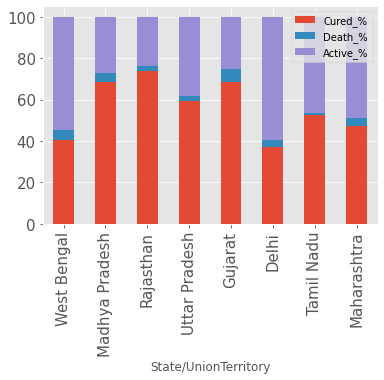

<Figure size 3600x1440 with 0 Axes>

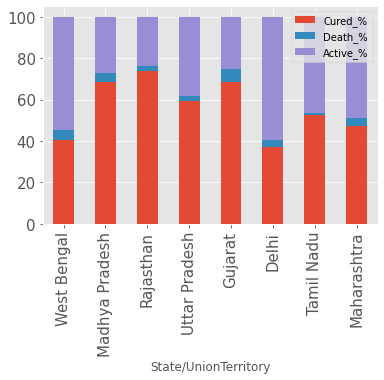

<Figure size 3600x1440 with 0 Axes>

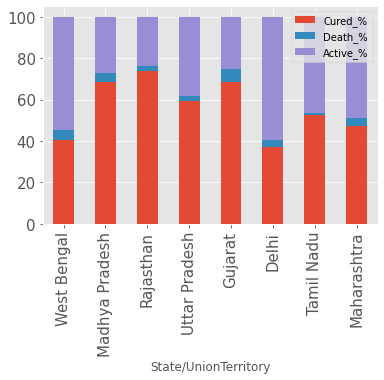

<Figure size 3600x1440 with 0 Axes>

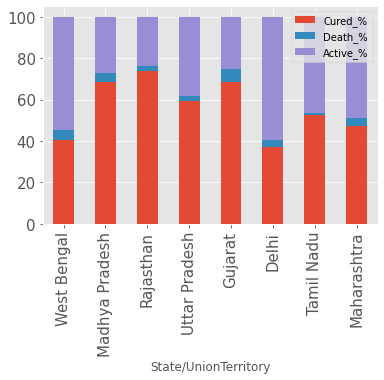

<Figure size 3600x1440 with 0 Axes>

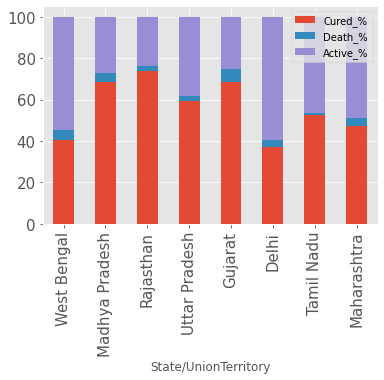

<Figure size 3600x1440 with 0 Axes>

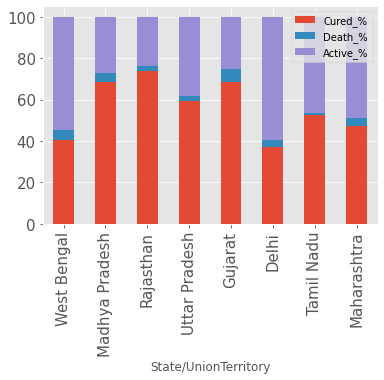

<Figure size 3600x1440 with 0 Axes>

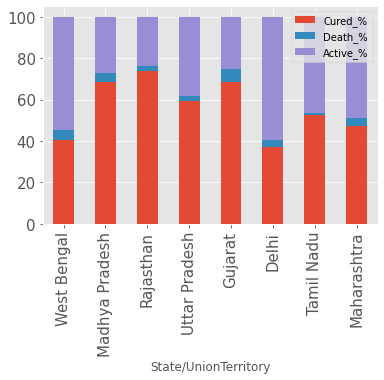

<Figure size 3600x1440 with 0 Axes>

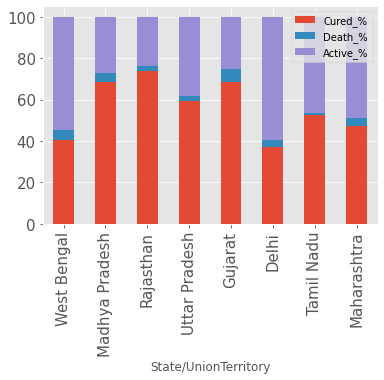

<Figure size 3600x1440 with 0 Axes>

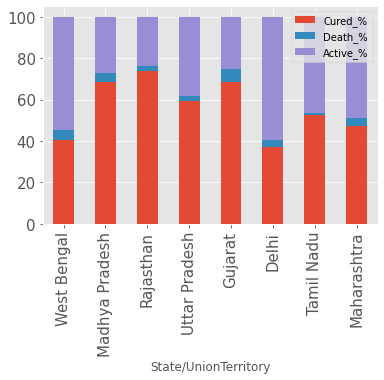

<Figure size 3600x1440 with 0 Axes>

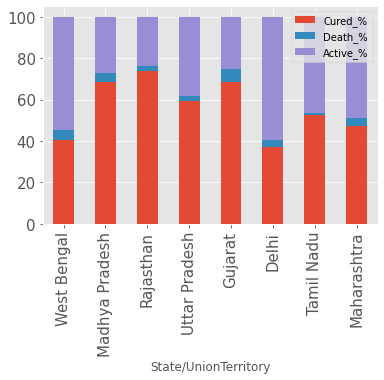

<Figure size 3600x1440 with 0 Axes>

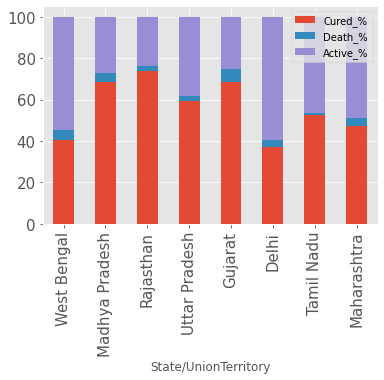

<Figure size 3600x1440 with 0 Axes>

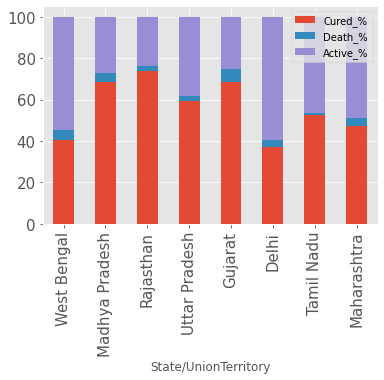

<Figure size 3600x1440 with 0 Axes>

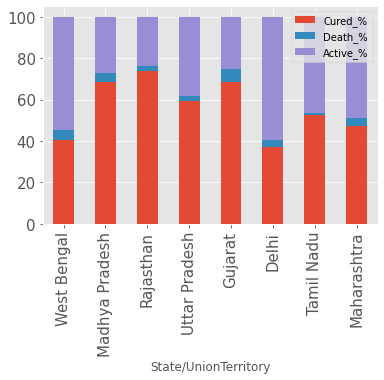

<Figure size 3600x1440 with 0 Axes>

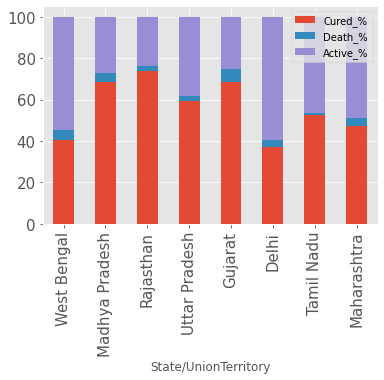

<Figure size 3600x1440 with 0 Axes>

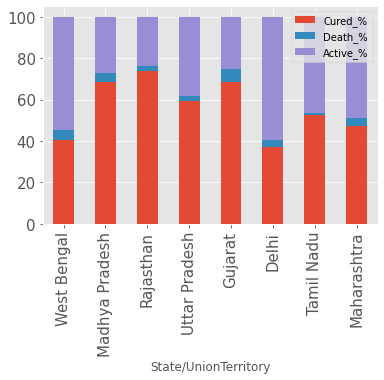

<Figure size 3600x1440 with 0 Axes>

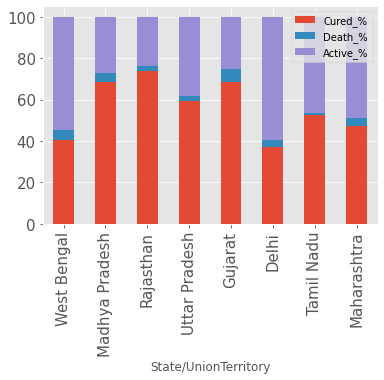

<Figure size 3600x1440 with 0 Axes>

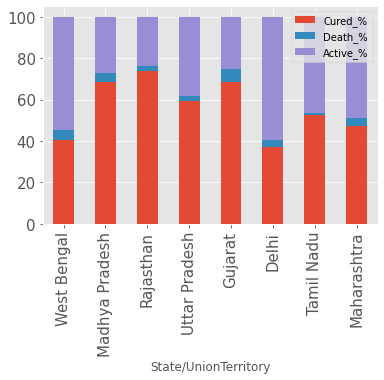

<Figure size 3600x1440 with 0 Axes>

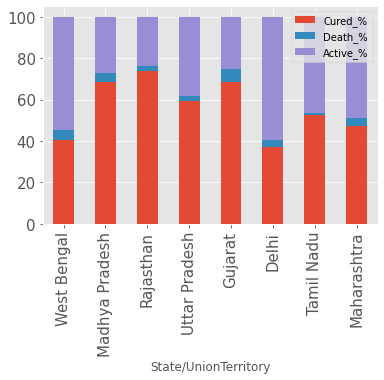

<Figure size 3600x1440 with 0 Axes>

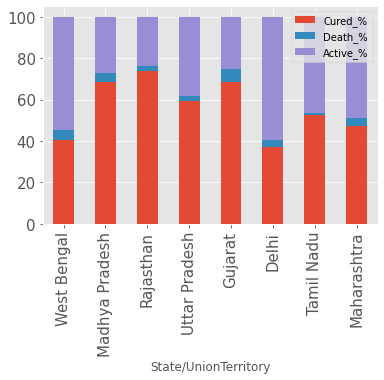

<Figure size 3600x1440 with 0 Axes>

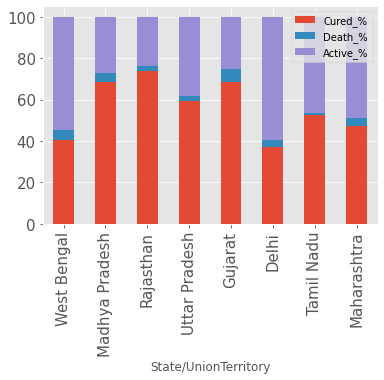

<Figure size 3600x1440 with 0 Axes>

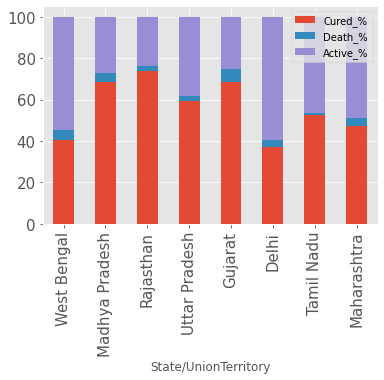

<Figure size 3600x1440 with 0 Axes>

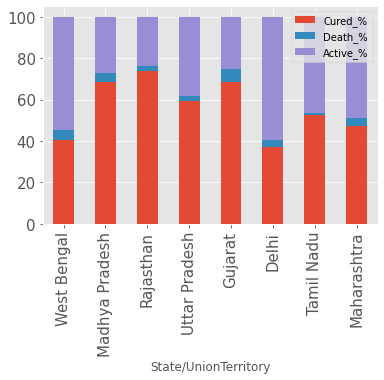

<Figure size 3600x1440 with 0 Axes>

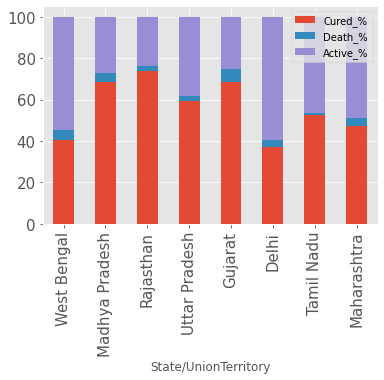

<Figure size 3600x1440 with 0 Axes>

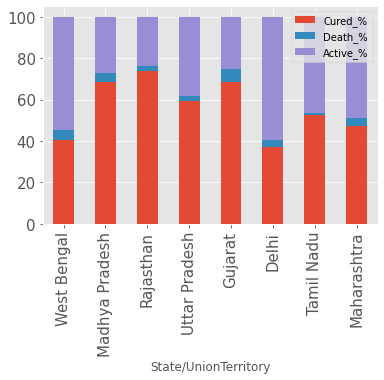

In [63]:
  %%timeit
plt.figure(figsize=(50, 20))
state_cases.plot(x='State/UnionTerritory', y=['Cured_%', 'Death_%', 'Active_%'], kind='bar', stacked = True, fontsize = 15)

In [64]:
!ls

557629_1234650_bundle_archive.zip  IndividualDetails.csv
AgeGroupDetails.csv		   population_india_census2011.csv
covid_19_india.csv		   sample_data
HospitalBedsIndia.csv		   StatewiseTestingDetails.csv
ICMRTestingLabs.csv


In [65]:
ICMR = pd.read_csv('ICMRTestingLabs.csv')
ICMR.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [0]:
ICMR.drop_duplicates(subset='lab', inplace = True)

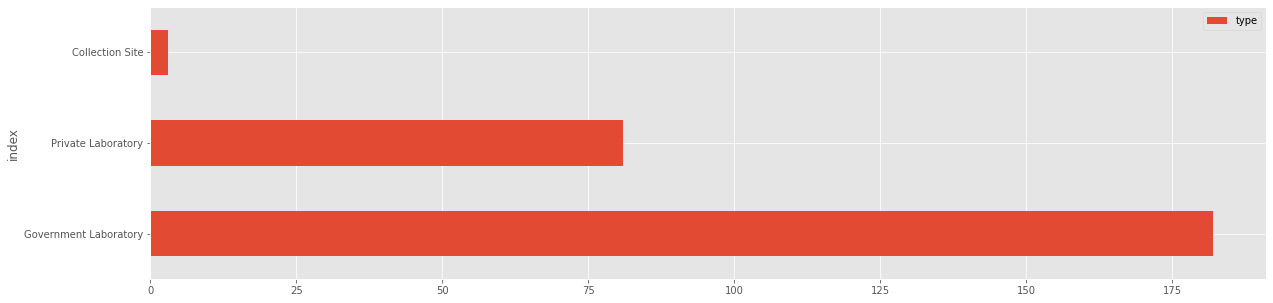

In [67]:
ICMR.type.value_counts().reset_index().plot(x = 'index', y= 'type', kind='barh',figsize=(20,5))

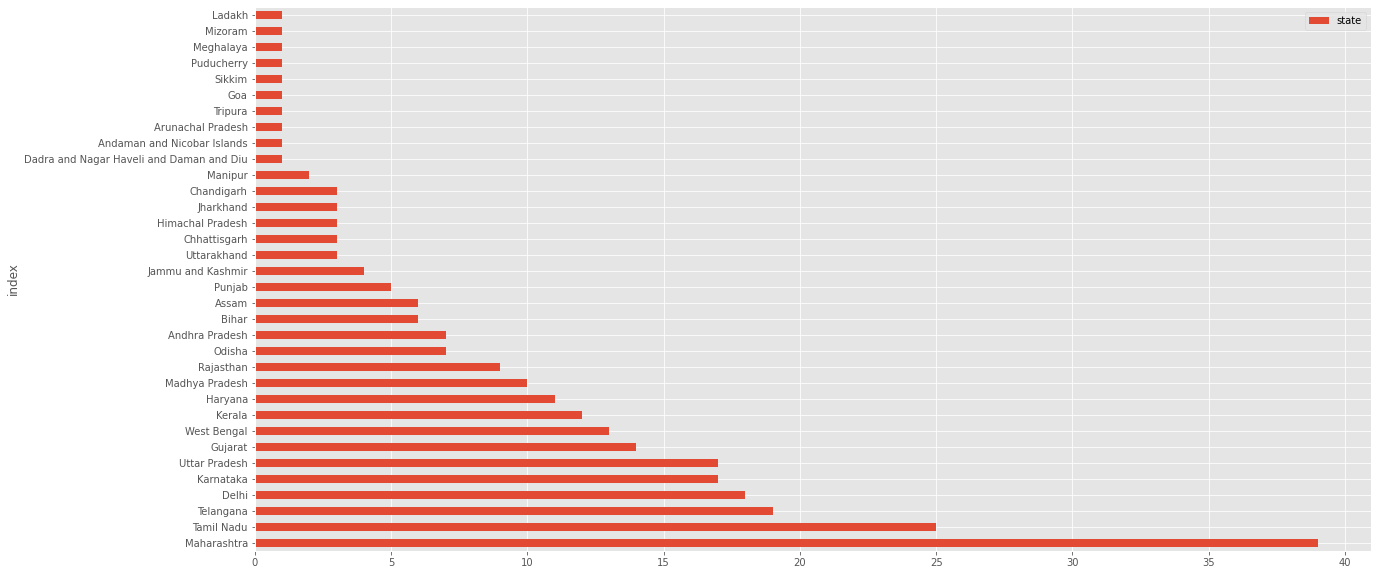

In [68]:
#plt.figure(figsize=(30, 50))
ICMR.state.value_counts().reset_index().plot(x = 'index', y= 'state', kind='barh',figsize=(20,10))

In [69]:
!ls

557629_1234650_bundle_archive.zip  IndividualDetails.csv
AgeGroupDetails.csv		   population_india_census2011.csv
covid_19_india.csv		   sample_data
HospitalBedsIndia.csv		   StatewiseTestingDetails.csv
ICMRTestingLabs.csv


In [70]:
pop = pd.read_csv('population_india_census2011.csv')
pop.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [0]:
pop.rename(columns={'State / Union Territory':'state'}, inplace=True)

d = ICMR.state.value_counts().reset_index()

In [72]:
pop.head()

,Sno,state,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [73]:
d.head()

,index,state
0,Maharashtra,39
1,Tamil Nadu,25
2,Telangana,19
3,Delhi,18
4,Karnataka,17


In [0]:
d.columns = ['state','test_labs']

temp = pd.merge(d, pop[['state','Population']], on='state')

temp = temp.sort_values(by='Population', ascending=False)

temp['Population_million']=temp['Population'] / 1000000

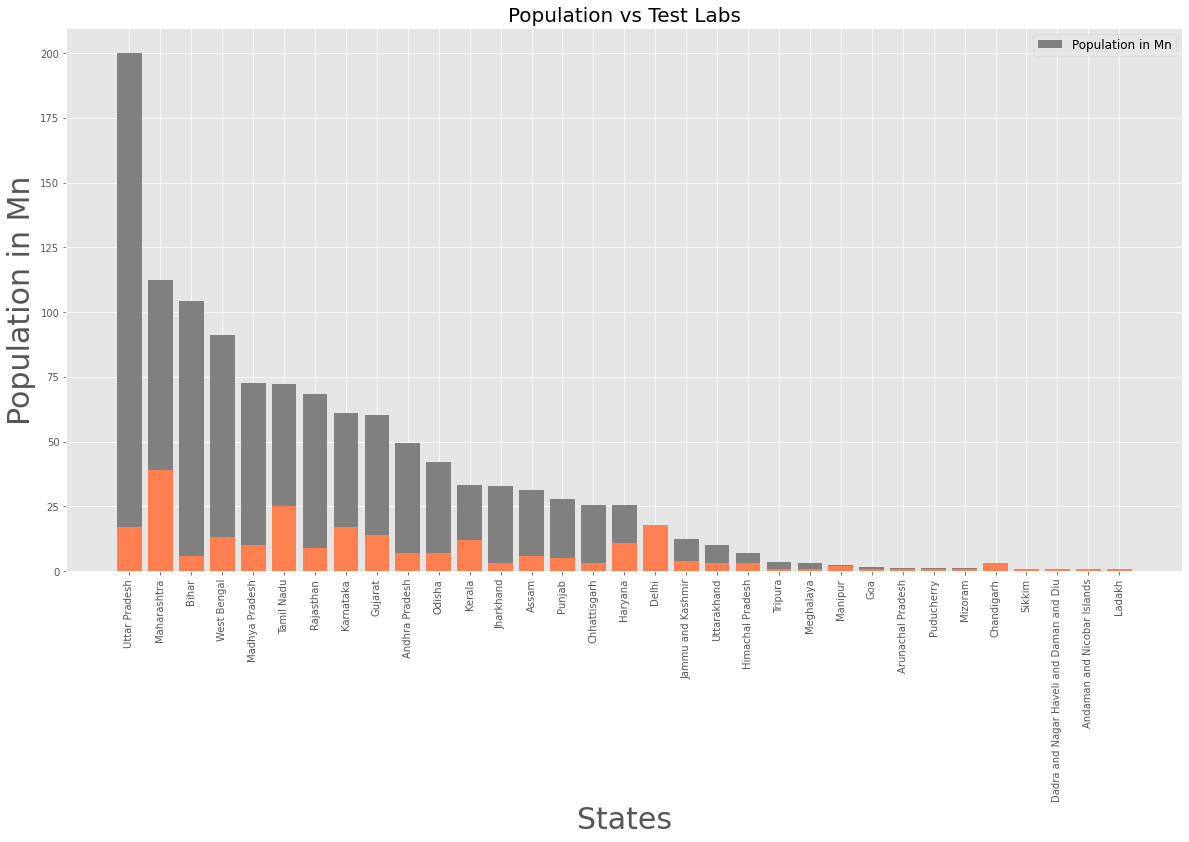

In [75]:
plt.figure(figsize=(20, 10))
plt.bar(temp['state'],temp['Population_million'],label='Population in Mn',color='grey')
plt.bar(temp['state'],temp['test_labs'],color='coral')
plt.xlabel('States',size=30)
plt.ylabel('Population in Mn',size=30)
plt.xticks(rotation = 90)

plt.legend(frameon=True,fontsize=12)
plt.title('Population vs Test Labs',fontsize=20)
plt.show()

In [76]:
!ls

557629_1234650_bundle_archive.zip  IndividualDetails.csv
AgeGroupDetails.csv		   population_india_census2011.csv
covid_19_india.csv		   sample_data
HospitalBedsIndia.csv		   StatewiseTestingDetails.csv
ICMRTestingLabs.csv


In [77]:
hos = pd.read_csv('HospitalBedsIndia.csv')
hos.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [78]:
hos.isnull().sum()

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        7
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [0]:
hos['total_bed'] = hos['NumPublicBeds_HMIS'] + hos['NumRuralBeds_NHP18'] + hos['NumUrbanBeds_NHP18']
hos = hos[hos['State/UT'] != 'All India']

hos = hos.sort_values(by='total_bed')

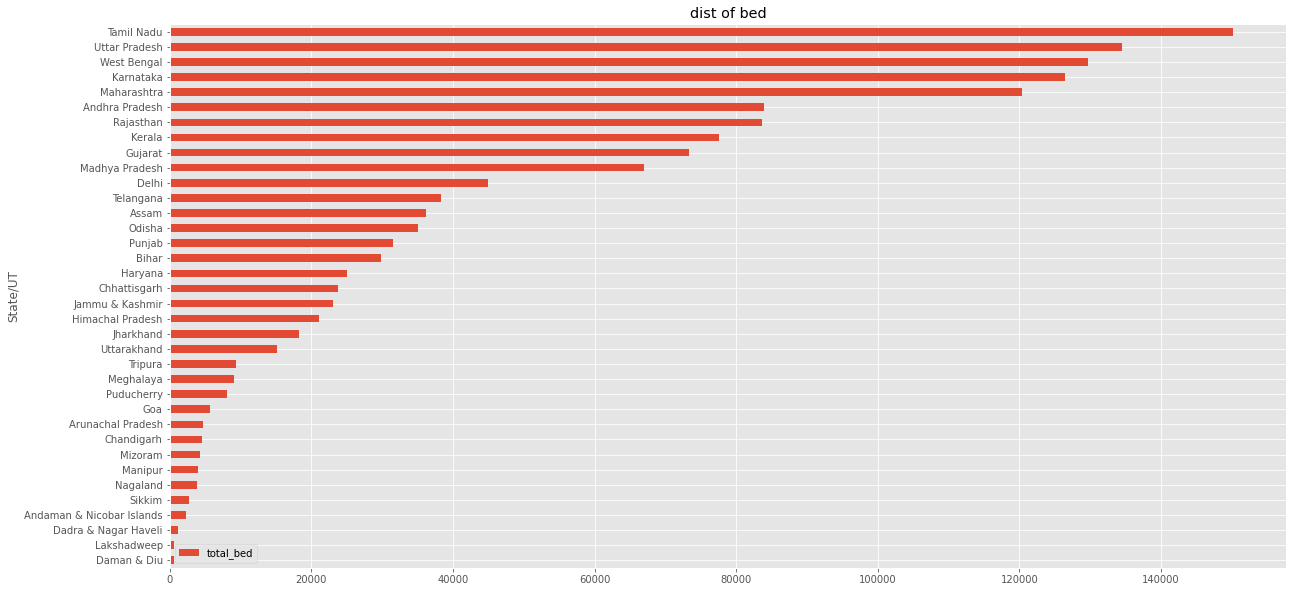

In [80]:
hos = hos[hos['State/UT'] != 'All India']
hos.plot(x='State/UT', y='total_bed', kind='barh', title='dist of bed', figsize=(20,10))
#plt.set_xlabel('STate')
#plt.set_ylabel('bed')
plt.show()

In [0]:
hos.rename(columns={'State/UT':'state'}, inplace=True)

In [82]:
pop.columns

Index(['Sno', 'state', 'Population', 'Rural population', 'Urban population',
       'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [0]:
temp1 = pd.merge(hos, pop[['state','Population']], on='state')

temp1['pop_mil'] = temp1['Population'] / 1000000

temp1 = temp1.sort_values(by='pop_mil', ascending=False)

In [84]:
temp1.head()

,Sno,state,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,total_bed,Population,pop_mil
29,34,Uttar Pradesh,3277,671,NaN,174,4122,58310,4442,39104,193,37156,134570,199812341,199.812341
26,21,Maharashtra,2638,430,101.0,70,3239,68998,273,12398,438,39048,120444,112374333,112.374333
16,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936,29815,104099452,104.099452
28,36,West Bengal,1374,406,70.0,55,1905,51163,1272,19684,294,58882,129729,91276115,91.276115
21,20,Madhya Pradesh,1420,324,72.0,51,1867,38140,334,10020,117,18819,66979,72626809,72.626809


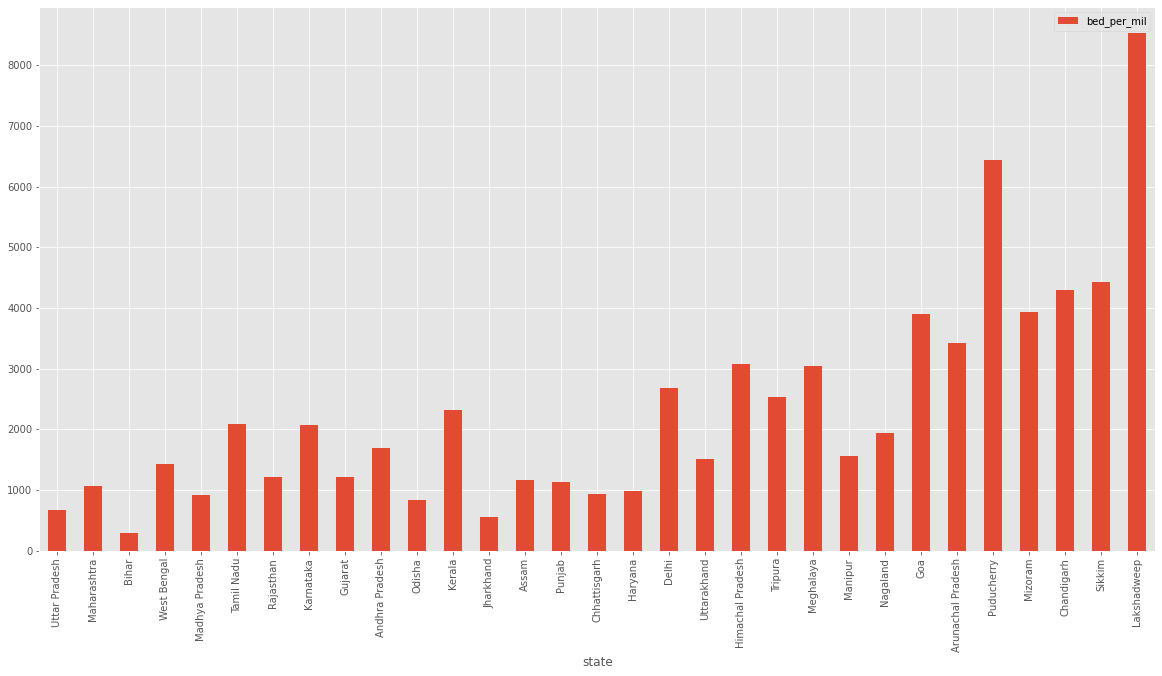

In [85]:
temp1['bed_per_mil'] = temp1['total_bed'] / temp1['pop_mil']

temp1.plot(x = 'state', y='bed_per_mil', kind='bar', figsize=(20,10))
plt.show()

In [86]:
!ls

557629_1234650_bundle_archive.zip  IndividualDetails.csv
AgeGroupDetails.csv		   population_india_census2011.csv
covid_19_india.csv		   sample_data
HospitalBedsIndia.csv		   StatewiseTestingDetails.csv
ICMRTestingLabs.csv


In [87]:
df_test = pd.read_csv('StatewiseTestingDetails.csv')
df_test.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [88]:
df_test.isnull().sum()

Date              0
State             0
TotalSamples      0
Negative        438
Positive          8
dtype: int64

In [89]:
df_test['Negative'].fillna(df_test['TotalSamples'] - df_test['Positive'], inplace=True)
df_test['Positive'].fillna(df_test['TotalSamples'] - df_test['Negative'], inplace=True)
df_test.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        7
Positive        7
dtype: int64

In [0]:
df_test['Date']= pd.to_datetime(df_test.Date)

In [91]:
test_cumu = df_test.groupby('Date')['TotalSamples','Negative','Positive'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [92]:
test_cumu.head()

,Date,TotalSamples,Negative,Positive
0,2020-04-01,11245.0,7824.0,302.0
1,2020-04-02,14906.0,12622.0,510.0
2,2020-04-03,20130.0,17242.0,898.0
3,2020-04-04,10786.0,8586.0,306.0
4,2020-04-05,56418.0,50850.0,2632.0


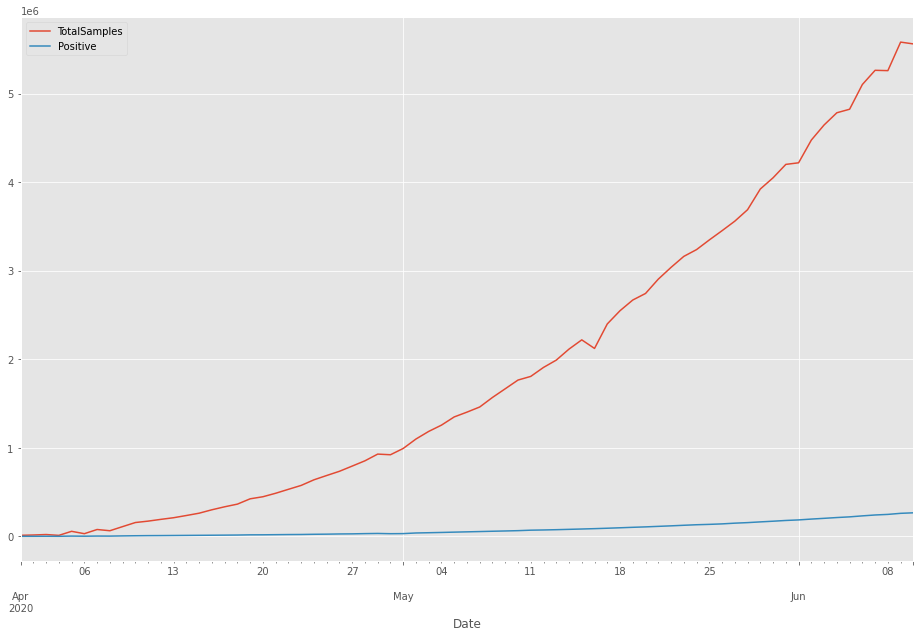

In [93]:
test_cumu.plot(x='Date', y=['TotalSamples','Positive'], kind='line', figsize=(16,10))